In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams
from skimage import io
from os.path import expanduser
from tqdm import tqdm
HOME = expanduser("~")
import os, sys
import cv2
from PIL import Image
from matplotlib.pyplot import imshow
import pandas as pd

%load_ext autoreload
%autoreload 2

In [3]:
animal = 'DK52'
DIR = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}'
INPUT = os.path.join(DIR, 'preps', 'CH3', 'thumbnail_aligned')
OUTPUT = os.path.join(DIR, 'preps', 'CH3', 'cvat')
files = sorted(os.listdir(INPUT))
start = 200
end = 220
files = files[200:221]
print(f'found {len(files)} files')

found 21 files


In [5]:
HOME = os.path.expanduser("~")
PATH = os.path.join(HOME, 'programming/pipeline_utility')
sys.path.append(PATH)
#from utilities.utilities_mask import equalized

100%|██████████| 21/21 [00:01<00:00, 17.98it/s]


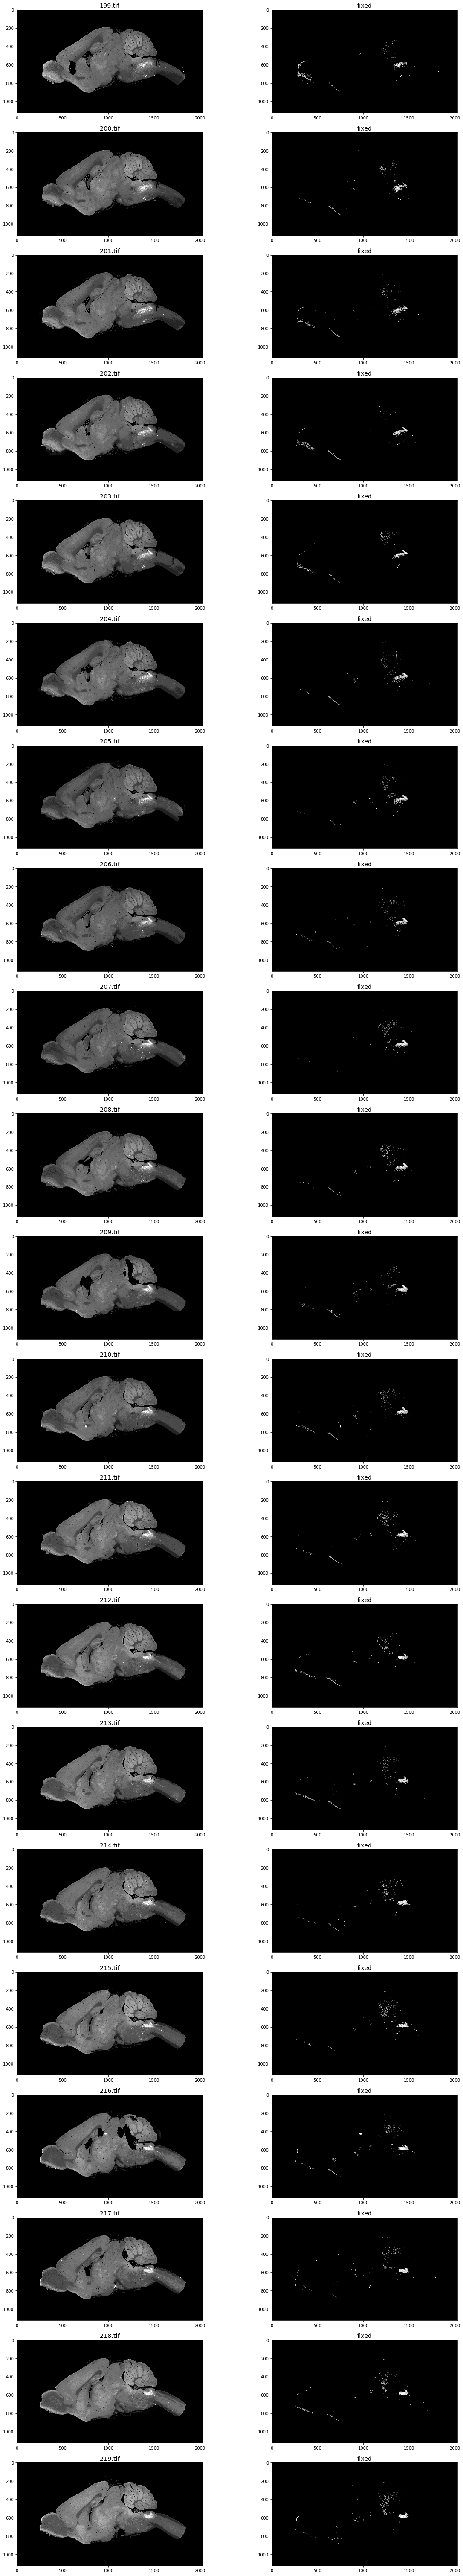

In [8]:
def crop_color(img):
    high = np.quantile(img, 0.995)
    img[img < high] = 0
    return img

names = []
imgs = []
fixes = []

for file in tqdm(files):
    infile = os.path.join(INPUT, file)
    img = io.imread(infile, img_num=0)
    orig = img.copy()
    fixed = crop_color(img)
    name = f'{file}'
    names.append(name)
    imgs.append(orig)
    fixes.append(fixed)
   
fig, ax = plt.subplots(nrows=len(names), ncols=2, sharex=False, sharey=False)
plt.style.use('classic')
i = 0
for name, img, fixed in zip(names, imgs, fixes):
    ax[i,0].set_title(f'{name}')
    ax[i,0].imshow(img, cmap="gray")
    ax[i,1].set_title('fixed')
    ax[i,1].imshow(fixed, cmap="gray")

    i += 1
fig.set_size_inches(np.array([18, 4 * len(names)]), forward=False)
plt.tight_layout()
plt.show()


In [ ]:
for file in tqdm(files):
    infile = os.path.join(INPUT, file)
    img = io.imread(infile)
    mask = compute_mask(img, m=0.2, M=0.9, cc=False, opening=2, exclude_zeros=True)
    mask = mask.astype(int)
    mask[mask==0] = 0
    mask[mask==1] = 255
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask.astype(np.uint8), kernel, iterations=2)
    mask = mask.astype(np.uint8)
    fixed = cv2.bitwise_and(img, img, mask=mask)
    fixed = equalized(fixed)


In [ ]:
cv2.IMREAD_UNCHANGED

In [ ]:
# 181, very dark
# 381, kinda light
file = '000.50.tif' 
infile = os.path.join(INPUT, file)

#img = tiff.imread(infile)
#print('tifffile', img.shape, img.dtype, img.ndim)
#del img
#img = io.imread(infile, plugin='tifffile')
#print('io tiff', img.shape, img.dtype, img.ndim)
#del img
img = cv2.imread(infile, cv2.IMREAD_UNCHANGED)
print(type(img))
print('cv2', img.shape, img.dtype, img.ndim)
del img



#ch1 = img[:,:,0]
#ch2 = img[:,:,1]
#ch3 = img[:,:,2]
#print('ch1',ch1.shape, ch1.dtype)
#print('ch2',ch2.shape, ch2.dtype)
#print('ch3',ch3.shape, ch3.dtype)

"""
mask = compute_mask(img, m=0.2, M=0.9, cc=False, opening=2, exclude_zeros=True)
mask = mask.astype(int)
mask[mask==0] = 0
mask[mask==1] = 255
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask.astype(np.uint8), kernel, iterations=2)
mask = mask.astype(np.uint8)

#fixed = img.copy()
print(mask.shape, mask.dtype)
#fixed[fixed < 50] = 0
fixed = cv2.bitwise_and(img, img, mask=mask)


# figure size in inches optional
rcParams['figure.figsize'] = 18 ,18
fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap="gray");
ax[0].set_title('original')
ax[1].imshow(fixed, cmap="gray");
ax[1].set_title('fixed')
"""
